# Project: Titanic - Machine Learning from Disaster

![](https://i.imgur.com/VYmLonF.jpg)

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("D:/codeee/train.csv")
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Note:
    Survived : sống sót 
    Pclass : hạng vé  ( 1st = tầng trên , 2nd = tầng giữa , 3rd = tầng dưới ) 
    SibSp : anh chị em /vợ chồng lên tàu
    Parch : cha mẹ / con cái lên tàu
    Fare : giá vé hành khách
    Cabin : số cabin
    Embarked : cảng lên tàu ( C = Cherbourg, Q = Queenstown, S = Southampton )


In [39]:
data.set_index(data.PassengerId, inplace=True)
data.drop('PassengerId',axis = 1, inplace=True)

In [40]:
# preview data
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
data.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [42]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [43]:
print("--- Tình trạng giá trị thiếu (trước khi fix) ---")
print(data.isnull().sum())
print("-" * 50)

--- Tình trạng giá trị thiếu (trước khi fix) ---
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64
--------------------------------------------------


In [49]:
# Fix 1: Cột Age (Biến Định lượng) -> Điền bằng Trung vị (Median)
age_median = data['Age'].median()
data['Age'].fillna(age_median, inplace=True)

# Fix 2: Cột Embarked (Biến Định tính) -> Điền bằng Mode (Giá trị phổ biến nhất)
embarked_mode = data['Embarked'].mode()[0]
data['Embarked'].fillna(embarked_mode, inplace=True)

# --- 3. Kiểm tra lại sau khi fix ---
print("\n--- Tình trạng giá trị thiếu (sau khi fix Age và Embarked) ---")
print(data.isnull().sum())
print("-" * 50)



--- Tình trạng giá trị thiếu (sau khi fix Age và Embarked) ---
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64
--------------------------------------------------


# Exploratory Data Analysis
# Categorial

In [49]:
num_rows, num_columns = data.shape
print(f"Số dòng của dữ liệu: {num_rows}")
print(f"Số cột của dữ liệu: {num_columns}")

Số dòng của dữ liệu: 891
Số cột của dữ liệu: 11


In [50]:
data["Survived"] = data["Survived"].astype("category")
features = ["Pclass","SibSp","Parch","Embarked","Sex"]
def convert_cat(data, features):
    for feature in features :
        data[feature] = data[feature].astype("category")
convert_cat(data, features)
column_data_types = data.dtypes
print(column_data_types)

Survived    category
Pclass      category
Name          object
Sex         category
Age          float64
SibSp       category
Parch       category
Ticket        object
Fare         float64
Cabin         object
Embarked    category
dtype: object


In [51]:
mean_age = data['Age'].mean()
data['Age'].fillna(mean_age,inplace=True)
mode_cabin = data['Cabin'].mode()[0]
data['Cabin'].fillna(mode_cabin, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       891 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     891 non-null    object  
 10  Embarked  891 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


In [52]:
data.describe()

,Age,Fare
count,891.000000,891.000000
mean,29.361582,32.204208
std,13.019697,49.693429
min,0.420000,0.000000
25%,22.000000,7.910400
50%,28.000000,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


In [53]:
data.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,891
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,646



# Survived

In [54]:
data["Survived"].value_counts().to_frame()


,count
Survived,
0,549
1,342


0 = chết  ,1 = sống

In [55]:
data["Survived"].value_counts(normalize=True).to_frame()

,proportion
Survived,
0,0.616162
1,0.383838


Chỉ 38% người sống sót qua thảm họa.

Text(0.5, 1.0, 'Biểu đồ sống sót')

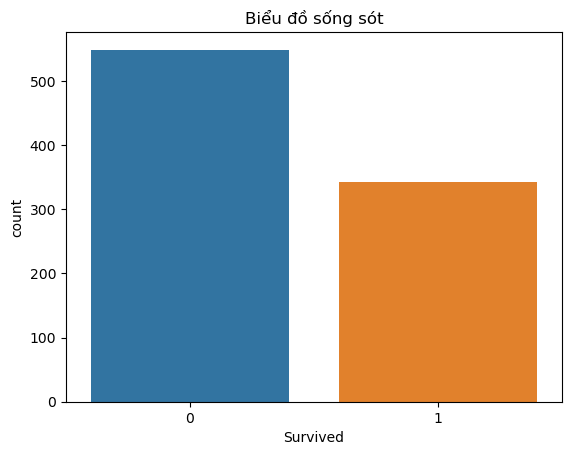

In [56]:
sns.countplot(data, x='Survived')
plt.title('Biểu đồ sống sót')

Nhìn vào biểu đồ sống sót có thể thấy tỉ lệ tử vong cao hơn nhiều so với tỉ lệ sóng sót gấp gần 1/2 lần.

# Sex


In [57]:
data["Sex"].value_counts().to_frame()

,count
Sex,
male,577
female,314


Text(0.5, 1.0, 'Biểu đồ sống sót so với giới tính')

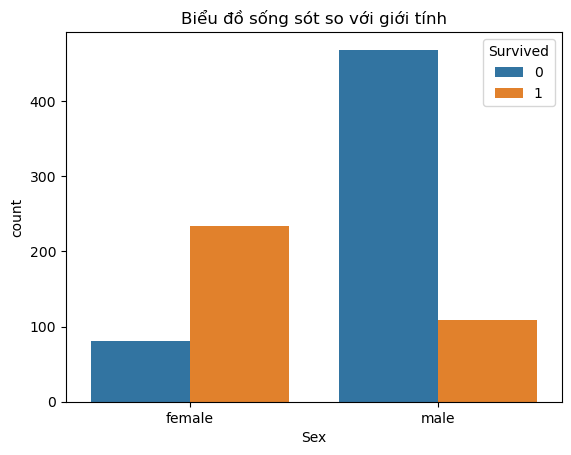

In [58]:
sns.countplot(data, x='Sex', hue='Survived');
plt.title('Biểu đồ sống sót so với giới tính')

Nhìn vào hình ta có thể thấy đối với nữ tỉ lệ sống sót cao hơn nhiều so với nam , tỉ lệ sống sót của nam chỉ bằng 1 nửa so với
nữ. Đều này nói lên rằng khi sự cố xẩy ra người ta ưu tiên phụ nữ và trẻ em lên thuyền cứu sinh trước nên tỉ lên sống sót của nữ cao hơn của nam giới.


# Embarked

In [59]:
data["Embarked"].value_counts().to_frame()

,count
Embarked,
S,646
C,168
Q,77


Text(0.5, 1.0, 'Biểu đồ sống sót với cảng mà hành khách lên tàu')

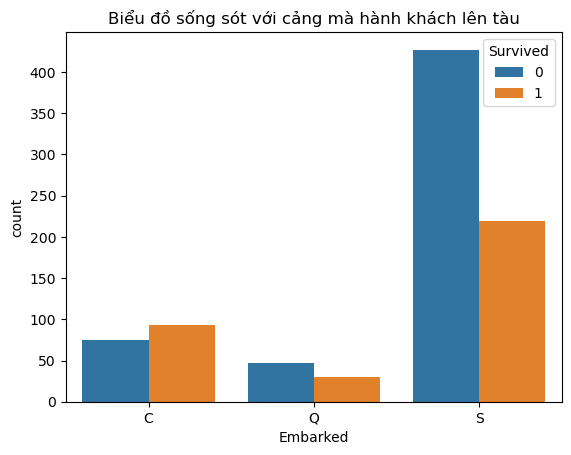

In [60]:
sns.countplot(data, x='Embarked', hue='Survived');
plt.title('Biểu đồ sống sót với cảng mà hành khách lên tàu')

Dựa vào biểu đồ tỉ lệ sống sót so với cảng mà hành khách lên tàu ta có thể thấy cảng thứ nhất là cảng Cherbourg , thứ hai là cảng Queenstown và thứ ba là cảng Southampton thì có thể thấy lượng hành khách lên tàu đến từ cảng S lớn nhất trong các cảng mà đa phần hành khách tử vong nhiều hơn so với tỉ lệ sống sót, đối với cảng C thì tỉ lệ sống sót lại cao hơn tỉ lệ tử vong còn cảng Q và cảng S tỉ lệ tử vong đều cao hơn tỉ lệ sống sót.

# Pclass

In [61]:
data["Pclass"].value_counts().to_frame()

,count
Pclass,
3,491
1,216
2,184


Text(0.5, 1.0, 'Biểu đồ sống sót so với hạng vé')

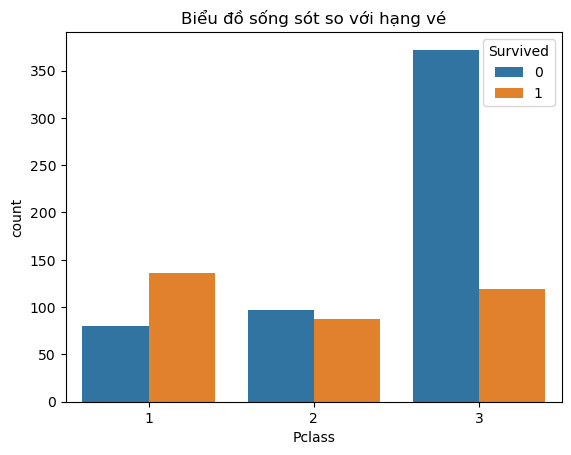

In [62]:
sns.countplot(data, x='Pclass', hue='Survived');
plt.title('Biểu đồ sống sót so với hạng vé')

Tiếp đến là tỉ lệ sống sót so với hạng vé lên tàu, có thể thấy trong biểu đồ là hạng vé 1 tỉ lệ sống sót cao hơn tỉ lệ tử vong điều này minh chứng rằng người đi vé hạng thương gia sẽ được ưu tiên lên thuyền cứu sinh , với hạng vé 2 thì tỉ lệ sống sót và tỉ lệ tử vong khá là ngang bằng nhau nhưng tỉ lệ tử vong lại nhỉnh hơn chút còn đối với hạng vé 3 thì tỉ lệ tử vong đạt mức cao nhất gần gấp 3 lần tỉ lệ sống sót

# SibSp


In [63]:
data["SibSp"].value_counts().to_frame()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


Text(0.5, 1.0, 'Biểu đồ sống sót với lượng Anh chị em/Chồng vợ đi chung')

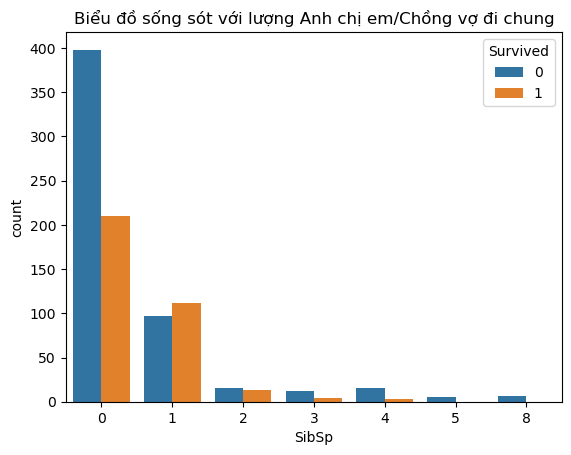

In [64]:
sns.countplot(data, x='SibSp', hue='Survived');
plt.title('Biểu đồ sống sót với lượng Anh chị em/Chồng vợ đi chung')

Ngoài ra còn có biểu đồ tỉ lệ sống sót so với lượng anh chị em/vợ chồng đi chung thì nhìn vào biểu đồ ta thấy được đa phần mọi người đều không đi chung với anh chị em hay vợ chồng gì cả nên lượng dữ liệu SibSp mức 0 là cao nhất và thường là họ có tỉ lệ tử vong rất nhiều so với tỉ lệ sống sót và tỉ lệ sống sót chỉ bằng 1 nửa so với người có anh chị em đi cùng.

# Parch


In [65]:
data["Parch"].value_counts().to_frame()

,count
Parch,
0,678
1,118
2,80
3,5
5,5
4,4
6,1


Text(0.5, 1.0, 'Biểu đồ sống sót so với con cái hoặc vợ/chồng đi chung')

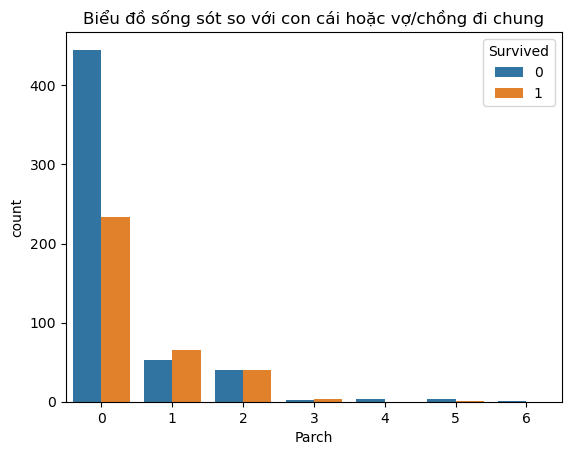

In [66]:
sns.countplot(data, x='Parch', hue='Survived');
plt.title('Biểu đồ sống sót so với con cái hoặc vợ/chồng đi chung')

với biểu đồ tỉ lệ sống sót so với con cái/vợ chồng đi chung thì ta có thể thấy trên biểu đồ thì đa phần người đi một mình cũng rất cao và những người này cũng có tỉ lệ tử vong cao nhất cũng gấp 1 nửa so với tỉ lệ sống sót, tiếp đến là người đi cùng bố hoặc mẹ thì tỉ lệ sống sót lại cao hơn một chút so với tỉ lệ tự vong , còn đi với hai người thì tỉ lệ sống sót và tử vong lại bằng nhau.

# Numerical
# Age

Text(0.5, 1.0, 'Biểu đồ sống sót so với độ tuổi  ')

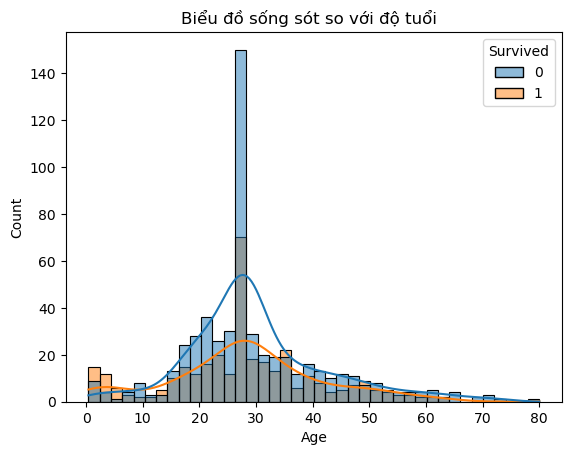

In [67]:
sns.histplot(data,x='Age',hue='Survived',bins = 40, kde=True)
plt.title('Biểu đồ sống sót so với độ tuổi  ')

Nhìn vào biểu đồ Histogram về tỉ lệ sống sót so với độ tuổi thì ta có thẩy thấy hành khách có độ tuổi từ 0 đến 6-7 tuổi thì tỉ lệ sống sót cao hơn tương ứng với cột màu cam cao hơn rất nhiều so với cột màu xanh là tử vong vì phụ nữ và trẻ em được ưu tiên lên thuyền cứu sinh khi có sự cố nên tỉ lệ sống sót cao hơn tỉ lệ tử vong và phần lớn lượng khách lên tàu là từ khoảng 18-40 tuổi.

# Fare

In [68]:
data["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Text(0.5, 1.0, 'Biểu đồ sống sót so với hạng vé')

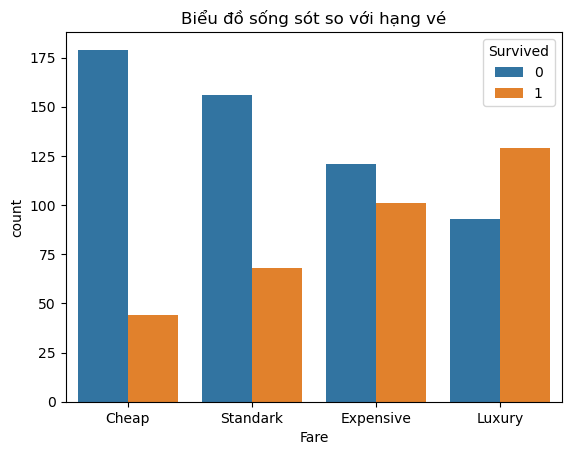

In [69]:
# đặt tên cho 0-25,25-50,50-75,75-100 lần lượt
fare_categories = ['Cheap','Standark','Expensive','Luxury']
data1 = pd.qcut(data['Fare'], 4 , labels=fare_categories)
sns.countplot(x=data1, hue=data['Survived']);
plt.title('Biểu đồ sống sót so với hạng vé')

Nhìn vào biểu đồ sống sót so với hạng vé thì ta có thể thấy người trả vé rẻ nhất thì chiếm khá nhiều và tỉ lệ tử vong cũng cao nhất gấp hơn 3 lần tỉ lệ sống sót, còn so với hạng vé thường thì tỉ lệ sống sót cũng khá hơn một tí so với hạng vé rẻ nhất và tỉ lệ tử vong cũng ít hơn không kém, với hạng vé đắt tiền hơn xíu thì tỉ lệ sống sót sẽ cao hơn gấp đôi tỉ lệ sống sót của vé rẻ nhất và tỉ lệ tử vong cũng giảm , đối với hạng thương gia thì ta có thể thấy tỉ lệ sống sót cao hơn rất nhiều so với tỉ lệ tử vong và cũng là hạng vé có tỉ lệ sống sót cao hơn tỉ lệ tử vong.

In [70]:
data['Fare']

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64

# Feature Engineering

# Name

In [71]:
data['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [72]:
import re 
def extract_title(name):
    p=re.compile(r",([\w\s]+)\.")
    return p.search(name).groups(1)[0].strip()
data['Title']=data['Name'].apply(lambda name:extract_title(name))

In [73]:
data['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [74]:
def group_title(title):
    if title in ['Mr','Mrs','Miss','Master']:
        return title
    elif title=="Ms":
        return "Miss"
    else:
        return "Others"
    
data['Title']=data['Title'].apply(lambda title: group_title(title))

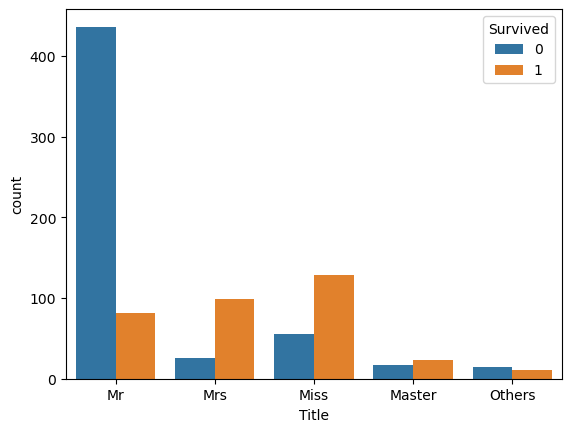

In [75]:
sns.countplot(data, x='Title', hue= 'Survived');

Nhìn vào biểu đồ ta có thể thấy Mr là những quý ông có tỉ lệ tử vong cao nhất khi so với tất cả những người còn lại còn những Mrs và Miss những người phụ nữ đa phần là tỉ lệ sống sót cao hơn thấy rõ bằng mắt thường , còn master và others thì ta có thể thấy tỉ lệ tử vong và tỉ lệ sống sót hơi ngang bằng nhau như Master thì sống sót nhỉnh hơn không đáng kể.

# Family
`SibSp`,`Parch`

In [76]:
data['FamilySize']=data['SibSp'].astype('int')+ data['Parch'].astype('int') + 1

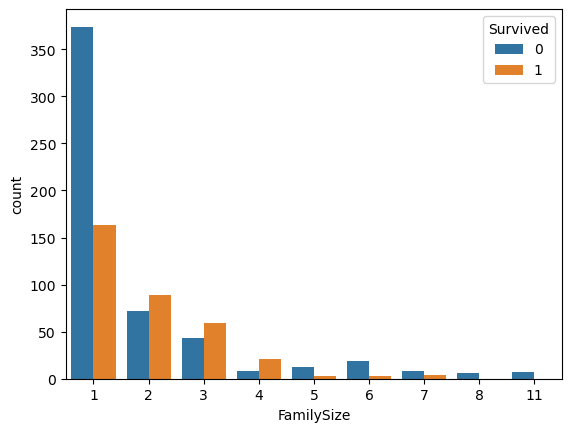

In [77]:
sns.countplot(data,x='FamilySize',hue='Survived');

Có thể thấy biểu đồ này đã chỉ ra mức độ ưu tiên cho việc giữ nguyên một gia đình chọn vẹn trong quá trình cứu hộ. Những người thân đi cùng có tỉ lệ sống sót cao hơn so với những hành khách du lịch một mình minh chứng đó là tỉ lệ tử vong của việc đi một mình là cao nhất gấp đôi so với tỉ lệ sống sót còn khi đi chung với gia đình hoặc người thân thì tỉ lệ sống sót cao hơn đối với đi từ 2 đến 4 người còn từ 5 đến 11 là tỉ lệ tử vong lại cao hơn nhưng không đáng kể.

# BIỂU ĐỒ MA TRẬN TƯƠNG QUAN

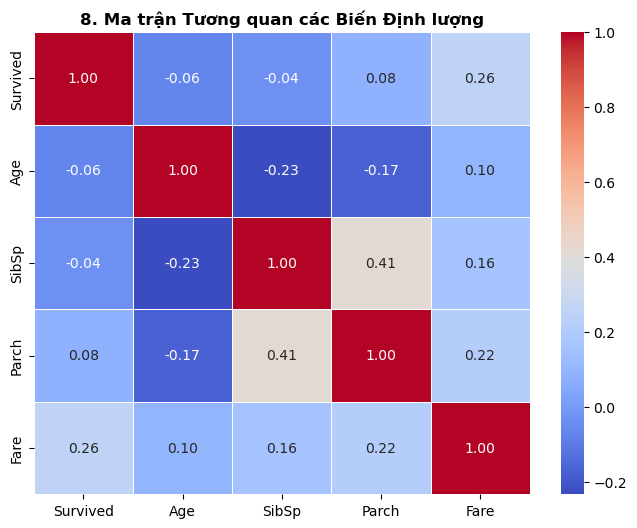

In [78]:
numerical_cols = ['Survived', 'Age', 'SibSp', 'Parch', 'Fare']
corr_matrix = data[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('8. Ma trận Tương quan các Biến Định lượng', fontweight='bold')
plt.show()

Dữ liệu cho thấy rõ ràng thảm họa này được quyết định bởi yếu tố xã hội và đạo đức ("Phụ nữ và trẻ em trước") hơn là các yếu tố cá nhân như tuổi tác (khi xét đơn lẻ). Vị trí trên tàu (gắn liền với Hạng vé) và Giới tính là định mệnh.

# Dự đoán khả năng sống sót (biến Survived)

In [79]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
data = pd.read_csv("D:/codeee/train.csv")

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
data = data[features + ['Survived']]

data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])          # male=1, female=0
data['Embarked'] = le.fit_transform(data['Embarked'])  # S,C,Q -> 0,1,2,...

X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Độ chính xác (Accuracy):", accuracy_score(y_test, y_pred))
print("\n Ma trận nhầm lẫn:")
print(confusion_matrix(y_test, y_pred))
print("\n Báo cáo phân loại:")
print(classification_report(y_test, y_pred))

coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print("\n Ảnh hưởng của từng đặc trưng:")
print(coef_df)


Độ chính xác (Accuracy): 0.8100558659217877

 Ma trận nhầm lẫn:
[[90 15]
 [19 55]]

 Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


 Ảnh hưởng của từng đặc trưng:
    Feature  Coefficient
5      Fare     0.002533
2       Age    -0.030430
4     Parch    -0.111821
6  Embarked    -0.218850
3     SibSp    -0.293865
0    Pclass    -0.930727
1       Sex    -2.596708


Mô hình Logistic Regression dự đoán khả năng sống sót đạt 81% chính xác, chứng tỏ mô hình đơn giản nhưng hiệu quả.

Giới tính (Sex) và hạng vé (Pclass) là hai yếu tố có tác động mạnh nhất đến khả năng sống.

Kết quả phù hợp với thực tế lịch sử:

“Phụ nữ và trẻ em trên các khoang hạng cao được ưu tiên cứu trước.”

Mô hình có thể được cải thiện thêm bằng cách:

- Tạo thêm đặc trưng mới (ví dụ: “FamilySize”, “IsAlone”)

- Sử dụng mô hình phi tuyến (Random Forest, XGBoost)

- Chuẩn hóa dữ liệu liên tục (Age, Fare)

# Mô hình Random Forest

 Độ chính xác (Random Forest): 0.8212290502793296

Ma trận nhầm lẫn:
[[92 13]
 [19 55]]

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179


Độ quan trọng của các đặc trưng:
    Feature  Importance
1       Sex    0.271410
5      Fare    0.265010
2       Age    0.249995
0    Pclass    0.086957
3     SibSp    0.053685
4     Parch    0.039897
6  Embarked    0.033044


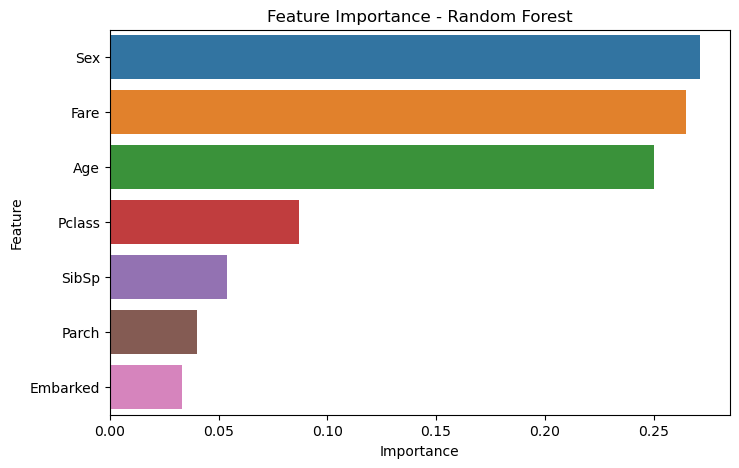

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Huấn luyện mô hình Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Dự đoán
y_pred_rf = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# Đánh giá
print(" Độ chính xác (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("\nMa trận nhầm lẫn:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nBáo cáo phân loại:")
print(classification_report(y_test, y_pred_rf))

# Xem độ quan trọng của từng đặc trưng
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nĐộ quan trọng của các đặc trưng:")
print(importances)

# Vẽ biểu đồ mức độ quan trọng
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title('Feature Importance - Random Forest')
plt.show()


Biểu đồ cho thấy các yếu tố xã hội và cá nhân (giới tính, thu nhập, tuổi) có vai trò quan trọng nhất trong khả năng sống sót.
Điều này phù hợp với thực tế lịch sử của vụ đắm tàu Titanic, nơi phụ nữ và trẻ em ở khoang cao được ưu tiên cứu hộ.

# Phân cụm K-Means (Clustering)

C:\Users\tnmt1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(



 Thống kê trung bình theo cụm:
               Age        Fare    Pclass
Cluster                                 
0        40.376984   47.914699  1.297619
1        24.855198   15.073617  2.800330
2        27.997576  226.813133  1.000000


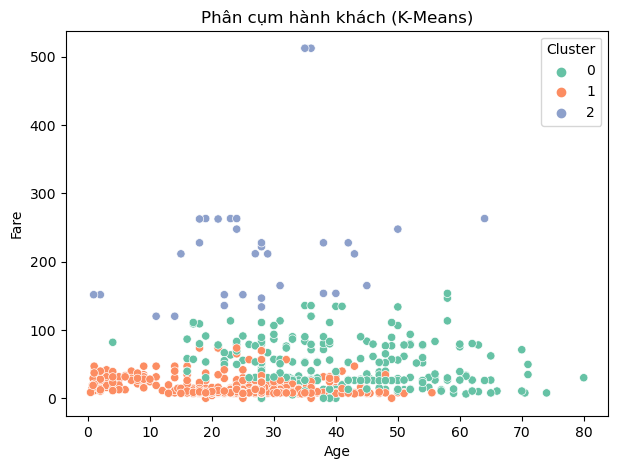

In [81]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Chỉ chọn các biến liên quan để phân cụm
cluster_data = data[['Age', 'Fare', 'Pclass']].copy()

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_data)
# Chọn số cụm k=3 (có thể thay đổi)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(cluster_scaled)

# Xem trung bình từng cụm
print("\n Thống kê trung bình theo cụm:")
print(data.groupby('Cluster')[['Age', 'Fare', 'Pclass']].mean())

# Trực quan hóa phân cụm
plt.figure(figsize=(7,5))
sns.scatterplot(x='Age', y='Fare', hue='Cluster', data=data, palette='Set2')
plt.title('Phân cụm hành khách (K-Means)')
plt.show()

Mô hình phân cụm K-Means đã chia hành khách thành 3 nhóm rõ ràng theo điều kiện kinh tế và độ tuổi:

Cụm 2: Giàu có, trẻ tuổi → có khả năng sống cao.

Cụm 1: Nghèo hơn, trẻ nhưng ở hạng thấp → khả năng sống thấp.

Cụm 0: Trung niên, khá giả → cơ hội sống trung bình.

- Kết quả này phù hợp với xu hướng trong dữ liệu Titanic:
Giới tính, tầng lớp xã hội và độ tuổi là các yếu tố ảnh hưởng mạnh nhất đến khả năng sống sót.

# Trực quan hóa kết quả mô hình (Logistic + Random Forest)

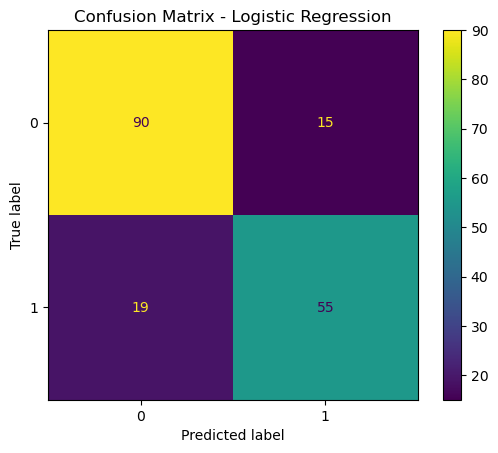

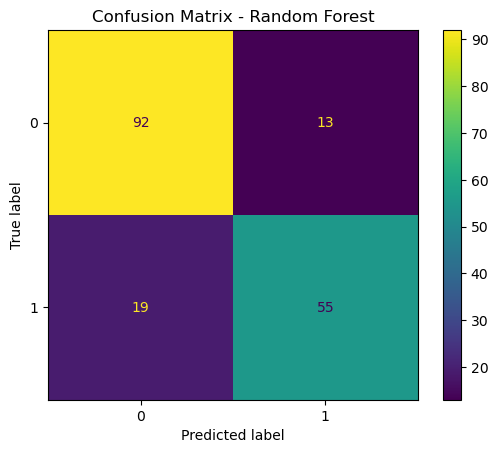

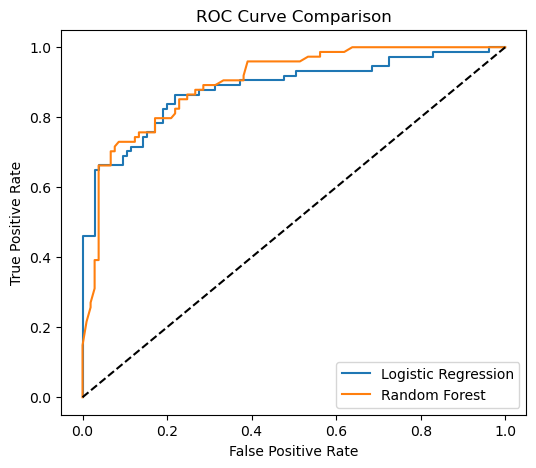

In [82]:
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix – Logistic Regression
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Confusion Matrix – Random Forest
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("Confusion Matrix - Random Forest")
plt.show()

# ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(6,5))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


Cả hai mô hình đều hoạt động tốt trong bài toán dự đoán khả năng sống sót.

Random Forest thể hiện hiệu quả cao hơn một chút nhờ khả năng mô hình hóa quan hệ phi tuyến.

Tuy nhiên, Logistic Regression vẫn có lợi thế ở tính đơn giản, dễ diễn giải và tốc độ huấn luyện nhanh.

- Trong thực tế, có thể ưu tiên Random Forest nếu mục tiêu là độ chính xác cao,
hoặc chọn Logistic Regression nếu cần mô hình đơn giản, dễ giải thích cho bài báo cáo hoặc ứng dụng thực tế.